In [298]:
import pandas as pd
import re 
import numpy as np
import itertools

## 1. Pengumpulan Data / Data Collection

Source Data : https://archive.ics.uci.edu/dataset/45/heart+disease

In [299]:
dir = 'hungarian.data'

## 2. Menelaah Data

Membuka dan Membaca File:

Kode membuka sebuah file dengan path yang ditentukan (dir).
Encoding Latin-1 digunakan untuk membaca isi file dengan benar.
Blok with digunakan untuk memastikan bahwa file akan ditutup secara otomatis setelah selesai.
Membaca dan Membersihkan Setiap Baris:

Setiap baris dari file dibaca dan disimpan dalam list bernama lines.
Karakter whitespace di awal dan akhir setiap baris dihilangkan dengan menggunakan metode .strip().
Mencetak 10 Baris Pertama:

Menggunakan slicing untuk mendapatkan 10 baris pertama dari list lines.
Tujuannya mungkin untuk memeriksa struktur dan konten awal dari file.

In [300]:
with open(dir , encoding='Latin1') as file:
    lines = [line.strip() for line in file]

lines [0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

Kode ini membuat DataFrame menggunakan modul itertools dan pandas. Berikut adalah deskripsi rinci tanpa menggunakan sintaks kode:

Iterasi dan Seleksi Data:

Menggunakan fungsi itertools.takewhile untuk mengambil baris-baris data yang memenuhi kondisi tertentu.
Kondisinya adalah panjang setiap baris harus sama dengan 76 karakter.
Pemformatan Data untuk DataFrame:

Menggunakan generator expression untuk membentuk grup data berisi 10 baris setiap grup.
Setiap grup diubah menjadi string dengan metode ' '.join(lines[i:(i+10)]) dan dipecah menjadi kata-kata menggunakan .split().
Membuat DataFrame dari Data yang Diteruskan:

Menggunakan pd.DataFrame.from_records(data) untuk membuat DataFrame dari data yang telah diproses.
Data diambil dari hasil iterasi sebelumnya.
Menampilkan 5 Baris Pertama DataFrame:

df.head(): Menampilkan 5 baris pertama dari DataFrame yang baru dibuat.

In [301]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines),10))
)
df = pd.DataFrame.from_records(data)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [303]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

In [304]:
df = df.astype(float)

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

## 3. Data Validasi

In [306]:
df.replace(-9.0, np.nan, inplace=True)
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [307]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

## 4. Menentukan Object Data

In [309]:
df_selected = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]]
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [310]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [311]:
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg', 
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target',
    
    
}

df_selected.rename(columns=column_mapping, inplace=True)

C:\Users\Rayen\AppData\Local\Temp\ipykernel_10012\368486387.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [312]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [313]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

## 5. Cleaning Data

In [314]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [315]:
columns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [316]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64


Kode ini menghitung dan memproses nilai rata-rata dari beberapa kolom tertentu dalam DataFrame (df_selected). Berikut adalah penjelasan langkah-langkahnya:

Pemilihan Data dari DataFrame:

Mengambil kolom tertentu dari DataFrame (df_selected) seperti 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', dan 'exang'.
Menghapus Nilai NaN (dropna):

Setiap kolom diproses dengan menghapus nilai NaN menggunakan metode .dropna().
Konversi ke Tipe Data Float:

Setiap kolom yang telah dihapus nilai NaN-nya kemudian diubah menjadi tipe data float menggunakan .astype(float).
Menghitung Nilai Rata-rata yang Sudah Dikonversi:

Setiap kolom yang sudah diubah menjadi float kemudian dihitung nilai rata-ratanya menggunakan .mean().
Pembulatan Nilai Rata-rata:

Nilai rata-rata yang dihasilkan kemudian dibulatkan menggunakan fungsi round().

In [317]:
meanTBPS = df_selected['trestbps'].dropna() 
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna() 
meanthalach = df_selected['thalach'].dropna() 
meanexang = df_selected['exang'].dropna()



meanTBPS = meanTBPS.astype(float) 
meanChol = meanChol.astype(float) 
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float) 
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)


meanTBPS = round(meanTBPS.mean()) 
meanChol = round(meanChol.mean()) 
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean()) 
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())



Kode ini mengisi nilai-nilai yang hilang (NaN) dalam DataFrame (df_selected) dengan nilai rata-rata yang telah dihitung sebelumnya. Berikut adalah penjelasan langkah-langkahnya:

Penyusunan Dictionary untuk Pengisian Nilai:

Membuat sebuah dictionary (fill_values) yang berisi kolom-kolom yang akan diisi dan nilai-nilai rata-rata yang telah dihitung sebelumnya.
Mengisi Nilai NaN dalam DataFrame:

Menggunakan metode fillna pada DataFrame (df_selected) dengan nilai yang diberikan oleh dictionary fill_values. Jadi, setiap nilai NaN dalam kolom yang terdaftar dalam dictionary akan diisi dengan nilai rata-rata yang telah dihitung.
Pembentukan DataFrame Baru:

DataFrame hasil dari pengisian nilai disimpan dalam variabel dfClean.
Informasi DataFrame Baru:

Menampilkan informasi mengenai DataFrame baru (dfClean) menggunakan info().

In [318]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
                'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}  
dfClean = df_selected.fillna(value=fill_values)

dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [319]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [320]:
duplicate_rows = dfClean.duplicated() 
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [321]:
print("All Duplicate Rows: ")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [322]:
dfClean = dfClean.drop_duplicates()
print('All Duplicate Rows: ')
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


## Finding Correlation between features

In [323]:
import matplotlib.pyplot as plt
import seaborn as sns

dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<AxesSubplot:>

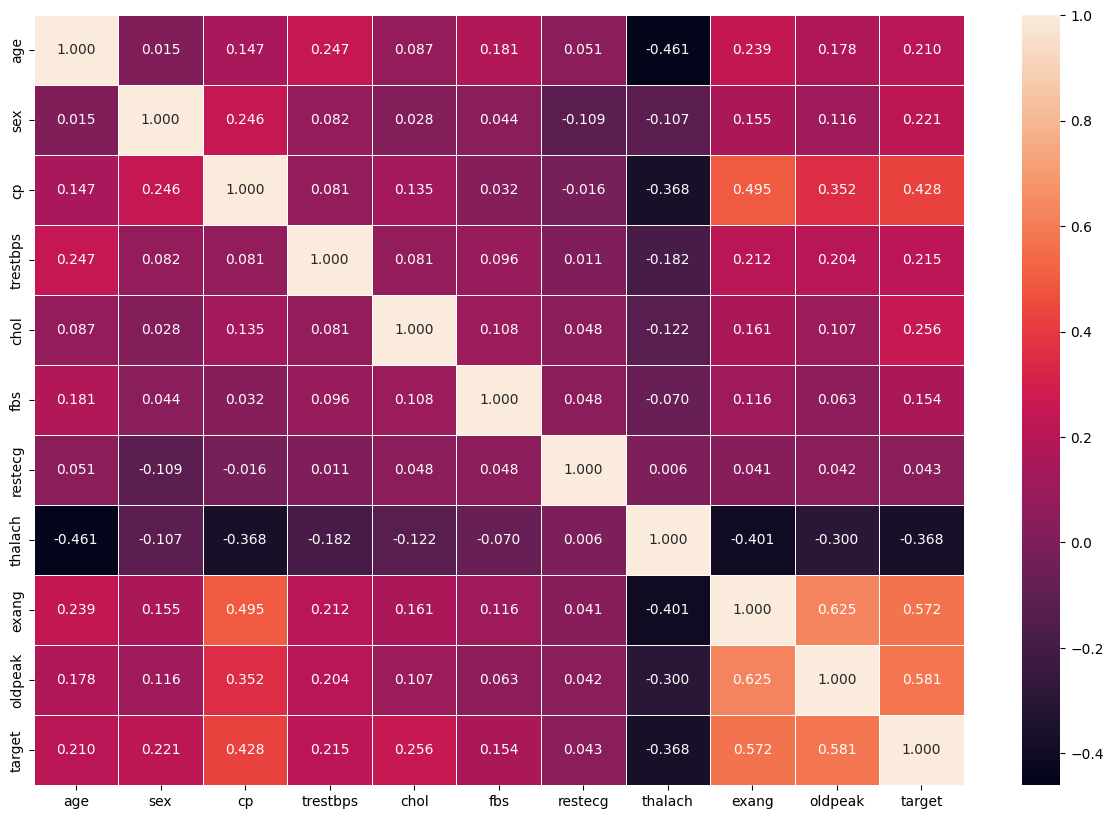

In [324]:
cor_mat = dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

## 6. Data Constructions

In [325]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [326]:
X = dfClean.drop("target",axis=1).values 
y = dfClean.iloc[:,-1]


Kode ini menggunakan matplotlib dan pandas untuk membuat diagram batang (bar plot) yang menunjukkan jumlah kategori pada kolom 'target' dalam DataFrame yang telah diisi nilai-nilainya (dfClean). Berikut adalah penjelasan langkah-langkahnya:

Menghitung Jumlah Kategori dalam Kolom 'target':

dfClean['target'].value_counts(): Menghitung jumlah setiap kategori dalam kolom 'target'.
Membuat Diagram Batang:

.plot(kind='bar', figsize=(10,6), color=['green','blue']): Membuat diagram batang dengan menggunakan metode plot. Tipe diagram batang diatur sebagai 'bar', dan warna batang diatur sebagai hijau dan biru.
figsize=(10,6): Mengatur ukuran figur plot.
Penambahan Judul dan Label:

plt.title("Count of the target"): Menambahkan judul pada plot.
plt.xticks(rotation=0): Mengatur rotasi label sumbu x agar tidak terdistorsi.

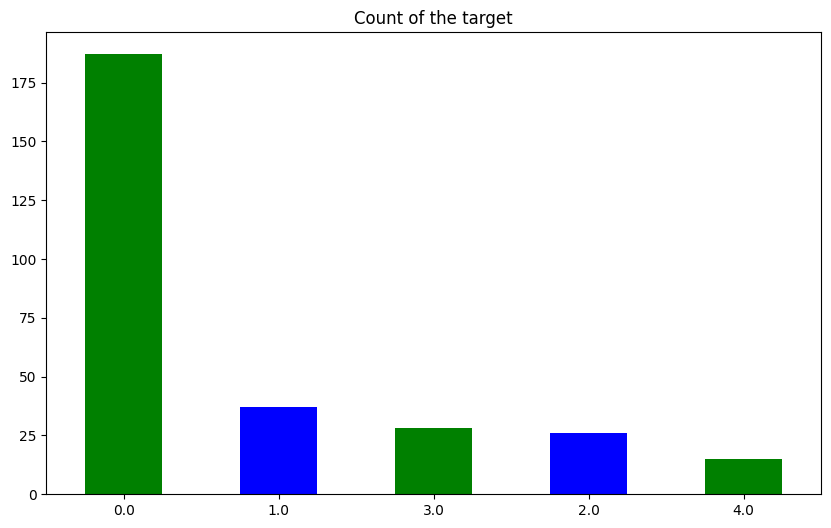

In [327]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue']) 
plt.title("Count of the target")
plt.xticks(rotation=0);


Kode ini menggunakan teknik oversampling SMOTE (Synthetic Minority Over-sampling Technique) untuk menangani ketidakseimbangan kelas dalam data. Berikut adalah penjelasan langkah-langkahnya:

Menerapkan Oversampling dengan SMOTE:

smote = SMOTE(random_state=42): Membuat objek SMOTE dengan menentukan seed untuk menghasilkan hasil yang dapat direproduksi.
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y): Menggunakan metode fit_resample untuk menerapkan oversampling SMOTE pada fitur (X) dan target (y). Hasilnya adalah data yang sudah dioversampling.
Visualisasi Sebelum dan Sesudah Oversampling:

Membuat subplot dengan dua bagian menggunakan plt.subplot(1, 2, 1) dan plt.subplot(1, 2, 2).
Bagian pertama (plt.subplot(1, 2, 1)) menunjukkan diagram batang sebelum oversampling.
Membuat DataFrame baru (new_df1) dari target (y) dan menampilkan diagram batang jumlah kategori.
Bagian kedua (plt.subplot(1, 2, 2)) menunjukkan diagram batang setelah oversampling dengan SMOTE.
Membuat DataFrame baru (new_df2) dari target (y_smote_resampled) dan menampilkan diagram batang jumlah kategori.
plt.tight_layout(): Mengatur layout plot agar tidak tumpang tindih.
plt.show(): Menampilkan plot.

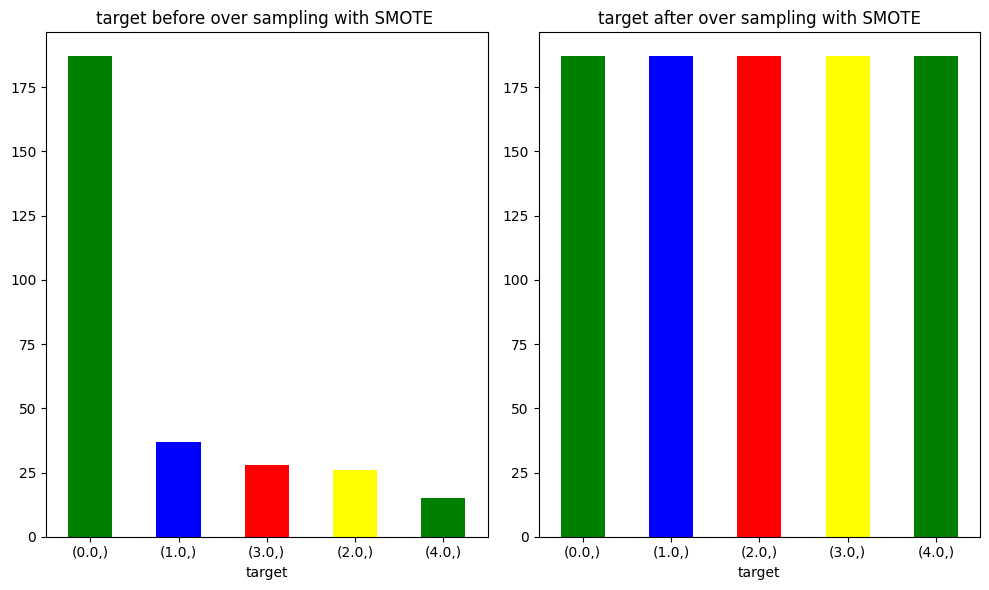

In [328]:
from imblearn.over_sampling import SMOTE


# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)



plt.figure(figsize=(12, 4))
new_df1 = pd.DataFrame(data=y) 
plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow']) 
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);


plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)


new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow']) 
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout() 
plt.show()


In [329]:
new_df1 = pd.DataFrame(data=y) 
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [330]:
new_df2 = pd.DataFrame(data=y_smote_resampled) 
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

In [331]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000



Kode ini menggunakan MinMaxScaler dari scikit-learn untuk melakukan penskalaan fitur pada data hasil oversampling dengan SMOTE (X_smote_resampled). Berikut adalah penjelasan langkah-langkahnya:

Membuat Objek MinMaxScaler:

scaler = MinMaxScaler(): Membuat objek MinMaxScaler, yang akan digunakan untuk penskalaan fitur.
Penskalaan Fitur pada Data Oversampling:

X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled): Menggunakan metode fit_transform untuk melakukan penskalaan fitur pada data hasil oversampling dengan SMOTE (X_smote_resampled). Hasilnya disimpan dalam variabel X_smote_resampled_normal.
Menghitung Panjang Data Setelah Penskalaan:

len(X_smote_resampled_normal): Menghitung panjang dari data setelah penskalaan. Panjang ini merepresentasikan jumlah baris pada data yang telah diproses.

In [332]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)


len(X_smote_resampled_normal) 

935

In [333]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal) 
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Kode ini menggunakan train_test_split dari scikit-learn untuk membagi data menjadi data pelatihan dan data uji. Berikut adalah penjelasan langkah-langkahnya:

Membagi Data yang Sudah Di-oversample:

X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled): Memisahkan data yang telah di-oversample dengan SMOTE menjadi data pelatihan (X_train, y_train) dan data uji (X_test, y_test).
test_size=0.2: Menentukan proporsi data yang akan digunakan sebagai data uji, dalam hal ini sebanyak 20% dari total data.
random_state=42: Menentukan seed untuk hasil yang dapat direproduksi.
stratify=y_smote_resampled: Memastikan bahwa pembagian data dilakukan secara proporsional terhadap kategori target (y_smote_resampled), sehingga distribusi kelas di data uji dan data pelatihan tetap sama.
Membagi Data yang Sudah Di-oversample dan Dinormalisasi:

X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42, stratify=y_smote_resampled): Memisahkan data yang telah di-oversample dan dinormalisasi dengan MinMaxScaler.
X_smote_resampled_normal: Data yang telah di-oversample dan dinormalisasi.
test_size=0.2, random_state=42, dan stratify=y_smote_resampled: Parameter yang sama digunakan untuk memastikan konsistensi dan proporsionalitas dalam pembagian data.

In [334]:
from sklearn.model_selection import train_test_split


# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)


# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)


Kode ini mendefinisikan sebuah fungsi evaluation untuk mengevaluasi kinerja model klasifikasi. Berikut adalah penjelasan rinci:

Parameter Fungsi:

Y_test: Label yang sebenarnya dari data uji.
Y_pred: Label yang diprediksi oleh model untuk data uji.
Metrik Evaluasi yang Dicatat:

accuracy_score: Menghitung akurasi (proporsi prediksi yang benar).
recall_score: Menghitung recall (sensitivitas) dengan rata-rata tertimbang.
f1_score: Menghitung skor F1 dengan rata-rata tertimbang.
precision_score: Menghitung presisi dengan rata-rata tertimbang.
Penggunaan Average Parameter:

average='weighted': Menentukan bahwa perhitungan recall, f1, dan presisi akan menggunakan rata-rata tertimbang.
Menyusun Hasil Evaluasi dalam Dictionary:

Membuat dictionary (metric_dict) yang berisi nilai-nilai dari masing-masing metrik evaluasi yang dihitung.
Nilai-nilai ini dibulatkan menjadi tiga desimal.
Menampilkan Hasil Evaluasi:

Fungsi mencetak dictionary metric_dict yang berisi hasil evaluasi.

## 7. Model

In [335]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score 
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted') 
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3), 'recall': round(rcl,3),
    'F1 score': round(f1,3),
    'Precision score': round(ps,3)
    }

    return print(metric_dict)


Kode ini membuat dan melatih model klasifikasi menggunakan algoritma K-Nearest Neighbors (KNN) dengan 3 tetangga terdekat. Berikut adalah penjelasan langkah-langkahnya:

Import Modul Klasifikasi:

from sklearn.neighbors import KNeighborsClassifier: Mengimpor kelas KNeighborsClassifier dari modul sklearn.neighbors untuk membuat model KNN.
Inisialisasi Model KNN:

knn_model = KNeighborsClassifier(n_neighbors=3): Membuat objek model KNN dengan menentukan jumlah tetangga terdekat (n_neighbors) sebanyak 3.
Pelatihan Model:

knn_model.fit(X_train, y_train): Melatih model KNN menggunakan data pelatihan (X_train dan y_train). Proses ini melibatkan pembelajaran pola dari fitur-fitur pada data pelatihan untuk melakukan prediksi pada data yang belum terlihat.

### KNN

In [336]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors = 3) 
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

Kode ini mengevaluasi model K-Nearest Neighbors (KNN) yang telah dilatih menggunakan data uji (X_test). Berikut adalah penjelasan langkah-langkahnya:

Melakukan Prediksi dengan Model KNN:

y_pred_knn = knn_model.predict(X_test): Menggunakan model KNN (knn_model) untuk melakukan prediksi pada data uji (X_test).
Evaluasi Kinerja Model:

accuracy_score(y_test, y_pred_knn): Menghitung akurasi model dengan membandingkan label sebenarnya (y_test) dan label yang diprediksi (y_pred_knn).
round(accuracy_score(y_test, y_pred_knn), 3): Membulatkan nilai akurasi menjadi tiga desimal.
classification_report(y_test, y_pred_knn): Menghasilkan laporan klasifikasi yang berisi sejumlah metrik evaluasi seperti precision, recall, dan F1-score.
Menampilkan Hasil Evaluasi:

Mencetak informasi mengenai kinerja model KNN, termasuk akurasi dan laporan klasifikasi.

In [337]:
y_pred_knn = knn_model.predict(X_test) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3) 
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [338]:
evaluation(y_test, y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}



Kode ini menghasilkan dan menampilkan matriks kebingungan (confusion matrix) dari hasil prediksi model K-Nearest Neighbors (KNN) pada data uji. Berikut adalah penjelasan langkah-langkahnya:

Menghitung Matriks Kebingungan:

confusion_matrix(y_test, y_pred_knn): Menghitung matriks kebingungan dengan membandingkan label sebenarnya (y_test) dan label yang diprediksi (y_pred_knn).
Menampilkan Matriks Kebingungan dalam Heatmap:

plt.figure(figsize=(8, 6)): Mengatur ukuran figur untuk plot heatmap.
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues"): Membuat heatmap dari matriks kebingungan. Setiap sel pada heatmap menunjukkan jumlah prediksi yang benar dan salah.
annot=True: Menampilkan angka di dalam setiap sel heatmap.
fmt="d": Mengatur format angka di dalam sel sebagai bilangan bulat.
cmap="Blues": Mengatur skema warna untuk heatmap.
plt.title('Confusion Matrix'): Menambahkan judul pada heatmap.
plt.xlabel('True') dan plt.ylabel('Predict'): Menyertakan label sumbu x dan y pada heatmap.
Menampilkan Plot:

plt.show(): Menampilkan plot heatmap.

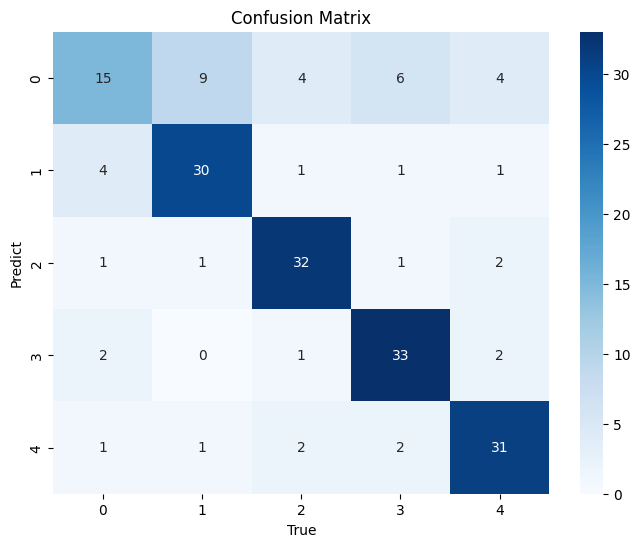

In [339]:
cm = confusion_matrix(y_test, y_pred_knn) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()


### Random Forest

In [340]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [341]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3) 
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))



Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [342]:

evaluation(y_test,y_pred_rf)


{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


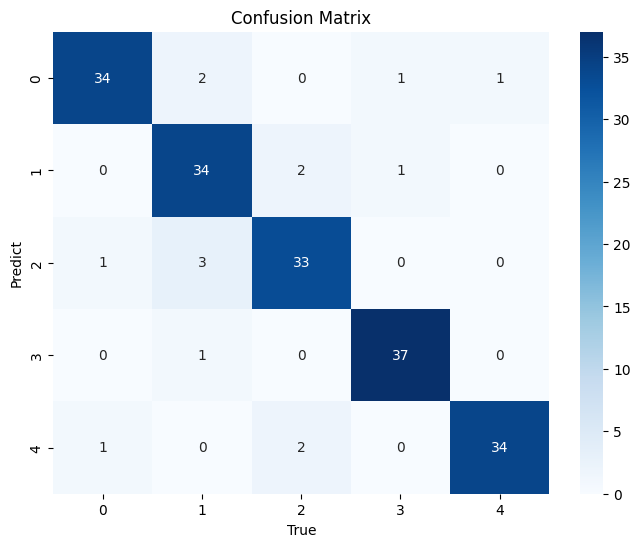

In [343]:
cm = confusion_matrix(y_test, y_pred_rf)
	
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()


### XGBoost

In [344]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42) 
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [345]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3) 
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.882
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.90      0.76      0.82        37
         2.0       0.82      0.86      0.84        37
         3.0       0.90      0.97      0.94        38
         4.0       0.89      0.92      0.91        37

    accuracy                           0.88       187
   macro avg       0.88      0.88      0.88       187
weighted avg       0.88      0.88      0.88       187



In [346]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.882, 'recall': 0.882, 'F1 score': 0.881, 'Precision score': 0.883}


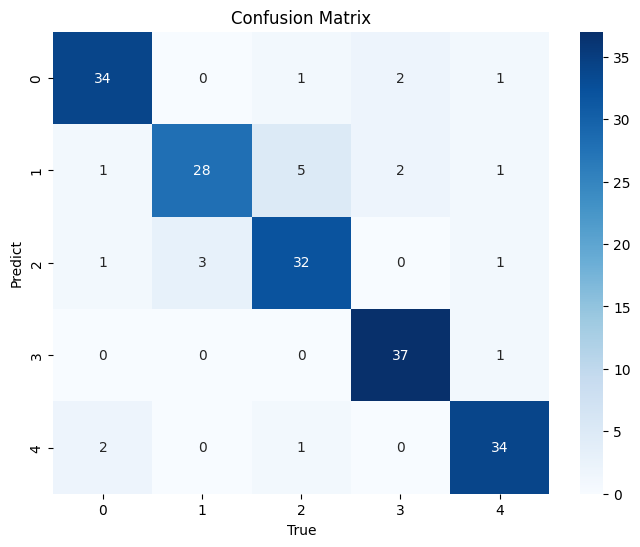

In [347]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()


## Oversample + Normalization

### KNN


Kode ini membuat dan melatih model klasifikasi menggunakan algoritma K-Nearest Neighbors (KNN) dengan 3 tetangga terdekat. Namun, yang membedakan dengan kode sebelumnya adalah kali ini data yang digunakan untuk pelatihan adalah data yang telah di-oversample dan dinormalisasi (X_train_normal). Berikut adalah penjelasan langkah-langkahnya:

Import Modul Klasifikasi:

from sklearn.neighbors import KNeighborsClassifier: Mengimpor kelas KNeighborsClassifier dari modul sklearn.neighbors untuk membuat model KNN.
Inisialisasi Model KNN:

knn_model = KNeighborsClassifier(n_neighbors=3): Membuat objek model KNN dengan menentukan jumlah tetangga terdekat (n_neighbors) sebanyak 3.
Pelatihan Model dengan Data yang Telah Di-Oversample dan Dinormalisasi:

knn_model.fit(X_train_normal, y_train_normal): Melatih model KNN menggunakan data pelatihan yang telah di-oversample dan dinormalisasi (X_train_normal dan y_train_normal).

In [348]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors=3) 
knn_model.fit(X_train_normal, y_train_normal)


KNeighborsClassifier(n_neighbors=3)


Kode ini mengevaluasi model K-Nearest Neighbors (KNN) yang telah dilatih dengan menggunakan data uji yang telah di-oversample dan dinormalisasi (X_test_normal). Berikut adalah penjelasan langkah-langkahnya:

Melakukan Prediksi dengan Model KNN:

y_pred_knn = knn_model.predict(X_test_normal): Menggunakan model KNN (knn_model) untuk melakukan prediksi pada data uji yang telah di-oversample dan dinormalisasi.
Evaluasi Kinerja Model:

accuracy_score(y_test_normal, y_pred_knn): Menghitung akurasi model dengan membandingkan label sebenarnya (y_test_normal) dan label yang diprediksi (y_pred_knn).
round(accuracy_score(y_test_normal, y_pred_knn), 3): Membulatkan nilai akurasi menjadi tiga desimal.
classification_report(y_test_normal, y_pred_knn): Menghasilkan laporan klasifikasi yang berisi sejumlah metrik evaluasi seperti precision, recall, dan F1-score.
Menampilkan Hasil Evaluasi:

Mencetak informasi mengenai kinerja model KNN yang menggunakan data uji yang telah di-oversample dan dinormalisasi.

In [349]:
y_pred_knn = knn_model.predict(X_test_normal) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3) 
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [350]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


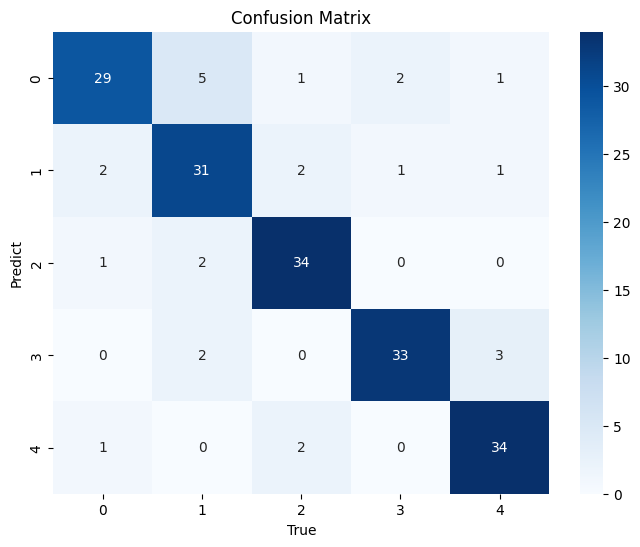

In [351]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()


### Random Forest

In [352]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)


Kode ini mengevaluasi model Random Forest yang telah dilatih dengan menggunakan data uji yang telah di-oversample dan dinormalisasi (X_test_normal). Berikut adalah penjelasan langkah-langkahnya:

Melakukan Prediksi dengan Model Random Forest:

y_pred_rf = rf_model.predict(X_test_normal): Menggunakan model Random Forest (rf_model) untuk melakukan prediksi pada data uji yang telah di-oversample dan dinormalisasi.
Evaluasi Kinerja Model Random Forest:

accuracy_score(y_test_normal, y_pred_rf): Menghitung akurasi model dengan membandingkan label sebenarnya (y_test_normal) dan label yang diprediksi (y_pred_rf).
round(accuracy_score(y_test_normal, y_pred_rf), 3): Membulatkan nilai akurasi menjadi tiga desimal.
classification_report(y_test_normal, y_pred_rf): Menghasilkan laporan klasifikasi yang berisi sejumlah metrik evaluasi seperti precision, recall, dan F1-score.
Menampilkan Hasil Evaluasi Model Random Forest:

Mencetak informasi mengenai kinerja model Random Forest yang menggunakan data uji yang telah di-oversample dan dinormalisasi.

In [353]:
y_pred_rf = rf_model.predict(X_test_normal) # Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3) 
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))



Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [354]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


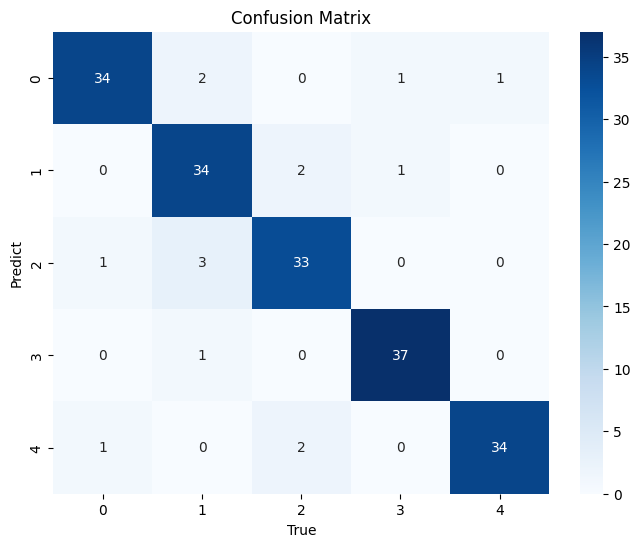

In [355]:
cm = confusion_matrix(y_test_normal, y_pred_rf) 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()


### XGBoost

In [356]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [357]:
y_pred_xgb = xgb_model.predict(X_test_normal) # Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3) 
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))



XGBoost Model:
Accuracy: 0.882
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.90      0.76      0.82        37
         2.0       0.82      0.86      0.84        37
         3.0       0.90      0.97      0.94        38
         4.0       0.89      0.92      0.91        37

    accuracy                           0.88       187
   macro avg       0.88      0.88      0.88       187
weighted avg       0.88      0.88      0.88       187



In [358]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.882, 'recall': 0.882, 'F1 score': 0.881, 'Precision score': 0.883}


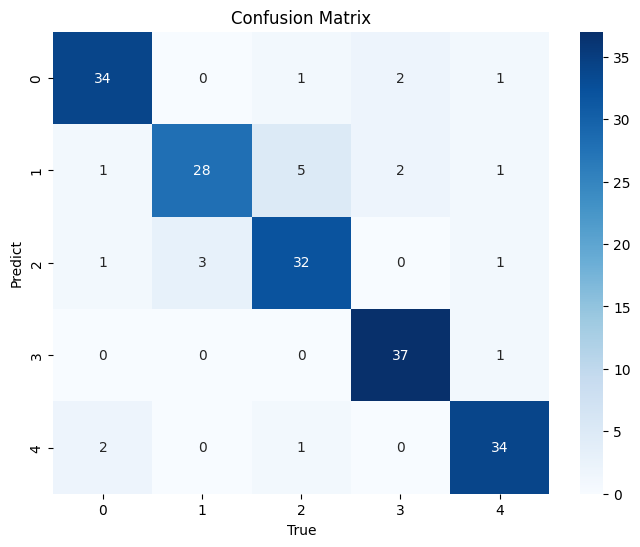

In [359]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()


## Tunning + Normalization + Oversample

### KNN

In [360]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.model_selection import RandomizedSearchCV



Kode ini menggunakan RandomizedSearchCV dari scikit-learn untuk melakukan pencarian parameter terbaik (hyperparameter tuning) pada model K-Nearest Neighbors (KNN) dengan data pelatihan yang telah di-oversample dan dinormalisasi (X_train_normal). Berikut adalah penjelasan langkah-langkahnya:

Menentukan Ruang Parameter yang Akan Diexplorasi:

param_grid: Membuat dictionary yang berisi ruang parameter yang akan diexplorasi.
"n_neighbors": range(3, 21): Jumlah tetangga terdekat yang akan diuji dari 3 hingga 20.
"metric": ["euclidean", "manhattan", "chebyshev"]: Metrik jarak yang akan diuji.
"weights": ["uniform", "distance"]: Jenis bobot yang akan diuji.
"algorithm": ["auto", "ball_tree", "kd_tree"]: Algoritma yang akan diuji.
"leaf_size": range(10, 61): Ukuran leaf yang akan diuji.
Inisialisasi Model KNN:

knn_model = KNeighborsClassifier(n_neighbors=3): Membuat objek model KNN awal.
Randomized Search Cross-Validation:

RandomizedSearchCV(...): Membuat objek RandomizedSearchCV dengan model KNN awal, ruang parameter, jumlah iterasi (n_iter=100), metrik evaluasi (scoring="accuracy"), dan skema validasi silang dengan 5 lipatan (cv=5).
knn_model.fit(X_train_normal, y_train_normal): Melakukan pencarian parameter terbaik dengan menggunakan data pelatihan yang telah di-oversample dan dinormalisasi.
Mencetak Parameter Terbaik:

best_params = knn_model.best_params_: Mendapatkan parameter terbaik dari hasil pencarian.
print(f"Best parameters: {best_params}"): Mencetak parameter terbaik.

In [361]:
param_grid = {
"n_neighbors": range(3, 21),
"metric": ["euclidean", "manhattan", "chebyshev"], "weights": ["uniform", "distance"],
"algorithm": ["auto", "ball_tree", "kd_tree"], "leaf_size": range(10, 61),
}

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)

knn_model.fit(X_train_normal, y_train_normal) 
best_params = knn_model.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'weights': 'distance', 'n_neighbors': 6, 'metric': 'manhattan', 'leaf_size': 53, 'algorithm': 'kd_tree'}



Kode ini mengevaluasi model K-Nearest Neighbors (KNN) yang telah dilatih setelah dilakukan pencarian parameter terbaik menggunakan RandomizedSearchCV. Evaluasi dilakukan pada data uji yang telah di-oversample dan dinormalisasi (X_test_normal). Berikut adalah penjelasan langkah-langkahnya:

Melakukan Prediksi dengan Model KNN yang Telah Dituning:

y_pred_knn = knn_model.predict(X_test_normal): Menggunakan model KNN yang telah dituning (knn_model) untuk melakukan prediksi pada data uji yang telah di-oversample dan dinormalisasi.
Evaluasi Kinerja Model KNN yang Telah Dituning:

accuracy_score(y_test_normal, y_pred_knn): Menghitung akurasi model dengan membandingkan label sebenarnya (y_test_normal) dan label yang diprediksi (y_pred_knn).
round(accuracy_score(y_test_normal, y_pred_knn), 3): Membulatkan nilai akurasi menjadi tiga desimal.
classification_report(y_test_normal, y_pred_knn): Menghasilkan laporan klasifikasi yang berisi sejumlah metrik evaluasi seperti precision, recall, dan F1-score.
Menampilkan Hasil Evaluasi Model KNN yang Telah Dituning:

Mencetak informasi mengenai kinerja model KNN yang telah dituning dengan menggunakan data uji yang telah di-oversample dan dinormalisasi.

In [362]:
y_pred_knn = knn_model.predict(X_test_normal) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3) 
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91        38
         1.0       0.82      0.86      0.84        37
         2.0       0.89      0.92      0.91        37
         3.0       0.95      1.00      0.97        38
         4.0       0.95      0.97      0.96        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [363]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.923}


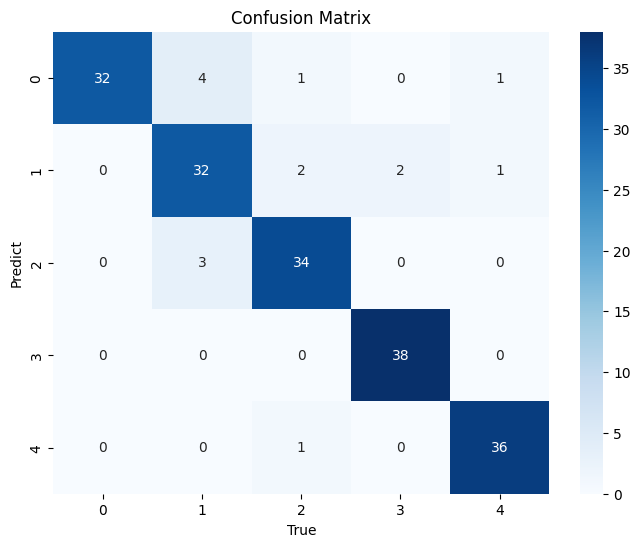

In [364]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()


### Random Forest


Kode ini melakukan pencarian parameter terbaik (hyperparameter tuning) untuk model Random Forest menggunakan RandomizedSearchCV. Proses ini dilakukan pada data pelatihan yang telah di-oversample dan dinormalisasi (X_train_normal dan y_train_normal). Berikut adalah penjelasan langkah-langkahnya:

Inisialisasi Model Random Forest:

rf_model = RandomForestClassifier(): Membuat objek model Random Forest awal.
Menentukan Ruang Parameter yang Akan Diexplorasi:

param_grid: Membuat dictionary yang berisi ruang parameter yang akan diexplorasi.
"n_estimators": [100, 200]: Jumlah pohon keputusan yang akan diuji.
"max_depth": [10, 15]: Kedalaman maksimum setiap pohon yang akan diuji.
"min_samples_leaf": [1, 2]: Jumlah sampel minimum di setiap daun yang akan diuji.
"min_samples_split": [2, 5]: Jumlah sampel minimum yang diperlukan untuk membagi simpul internal yang akan diuji.
"max_features": ["sqrt", "log2"]: Jumlah fitur maksimum yang akan diuji.
Randomized Search Cross-Validation:

RandomizedSearchCV(...): Membuat objek RandomizedSearchCV dengan model Random Forest awal, ruang parameter, jumlah iterasi (n_iter=100), skema validasi silang dengan 5 lipatan (cv=5), dan menjalankan proses paralel menggunakan semua core yang tersedia (n_jobs=-1).
rf_model.fit(X_train_normal, y_train_normal): Melakukan pencarian parameter terbaik dengan menggunakan data pelatihan yang telah di-oversample dan dinormalisasi.
Mencetak Parameter Terbaik:

best_params = rf_model.best_params_: Mendapatkan parameter terbaik dari hasil pencarian.
print(f"Best parameters: {best_params}"): Mencetak parameter terbaik.

In [365]:
rf_model = RandomForestClassifier()
	
param_grid = {
"n_estimators": [100, 200],
"max_depth": [ 10, 15],
"min_samples_leaf": [1, 2],
"min_samples_split": [2, 5],
"max_features": ["sqrt", "log2"], # "random_state": [42, 100, 200]
}

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1) 
rf_model.fit(X_train_normal, y_train_normal)
best_params = rf_model.best_params_
print(f"Best parameters: {best_params}")


c:\Users\Rayen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}



Kode ini mengevaluasi model Random Forest yang telah dituning dengan parameter terbaik yang ditemukan melalui RandomizedSearchCV. Evaluasi dilakukan pada data uji yang telah di-oversample dan dinormalisasi (X_test_normal). Berikut adalah penjelasan langkah-langkahnya:

Melakukan Prediksi dengan Model Random Forest yang Telah Dituning:

y_pred_rf = rf_model.predict(X_test_normal): Menggunakan model Random Forest yang telah dituning (rf_model) untuk melakukan prediksi pada data uji yang telah di-oversample dan dinormalisasi.
Evaluasi Kinerja Model Random Forest yang Telah Dituning:

accuracy_score(y_test_normal, y_pred_rf): Menghitung akurasi model dengan membandingkan label sebenarnya (y_test_normal) dan label yang diprediksi (y_pred_rf).
round(accuracy_score(y_test_normal, y_pred_rf), 3): Membulatkan nilai akurasi menjadi tiga desimal.
classification_report(y_test_normal, y_pred_rf): Menghasilkan laporan klasifikasi yang berisi sejumlah metrik evaluasi seperti precision, recall, dan F1-score.
Menampilkan Hasil Evaluasi Model Random Forest yang Telah Dituning:

Mencetak informasi mengenai kinerja model Random Forest yang telah dituning dengan menggunakan data uji yang telah di-oversample dan dinormalisasi.

In [366]:
y_pred_rf = rf_model.predict(X_test_normal) # Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3) 
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf))



Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.87      0.89      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.92      0.95      0.94        38
         4.0       0.97      0.95      0.96        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [367]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.92}


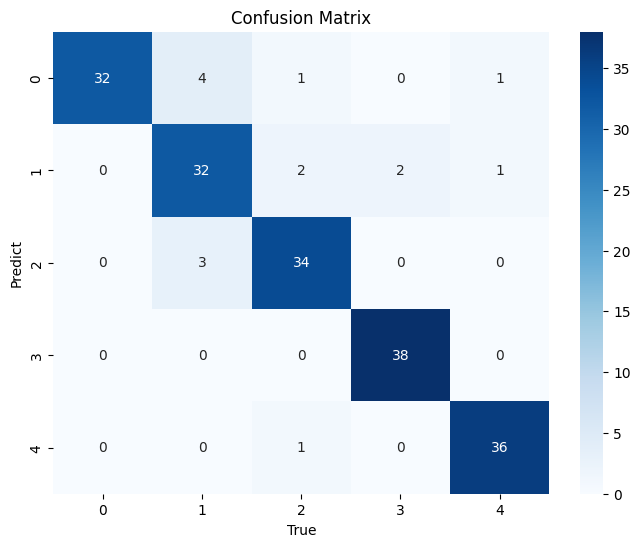

In [368]:
cm = confusion_matrix(y_test_normal, y_pred_knn)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()


### XGBoost


Kode ini melakukan pencarian parameter terbaik (hyperparameter tuning) untuk model XGBoost menggunakan RandomizedSearchCV. Proses ini dilakukan pada data pelatihan yang telah di-oversample dan dinormalisasi (X_train_normal dan y_train_normal). Berikut adalah penjelasan langkah-langkahnya:

Inisialisasi Model XGBoost:

xgb_model = XGBClassifier(): Membuat objek model XGBoost awal.
Menentukan Ruang Parameter yang Akan Diexplorasi:

param_grid: Membuat dictionary yang berisi ruang parameter yang akan diexplorasi.
"max_depth": [3, 5, 7]: Kedalaman maksimum dari setiap pohon yang akan diuji.
"learning_rate": [0.01, 0.1]: Tingkat pembelajaran yang akan diuji.
"n_estimators": [100, 200]: Jumlah pohon keputusan yang akan diuji.
"gamma": [0, 0.1]: Parameter yang mengontrol apakah suatu node akan dibagi berdasarkan perbedaan dalam fungsi objektif yang akan diuji.
"colsample_bytree": [0.7, 0.8]: Fraksi fitur yang akan diuji.
Randomized Search Cross-Validation:

RandomizedSearchCV(...): Membuat objek RandomizedSearchCV dengan model XGBoost awal, ruang parameter, jumlah iterasi (n_iter=10), skema validasi silang dengan 5 lipatan (cv=5), dan menjalankan proses paralel menggunakan semua core yang tersedia (n_jobs=-1).
xgb_model.fit(X_train_normal, y_train_normal): Melakukan pencarian parameter terbaik dengan menggunakan data pelatihan yang telah di-oversample dan dinormalisasi.
Mencetak Parameter Terbaik:

best_params = xgb_model.best_params_: Mendapatkan parameter terbaik dari hasil pencarian.
print(f"Best parameters: {best_params}"): Mencetak parameter terbaik.

In [369]:
xgb_model = XGBClassifier()

param_grid = {
"max_depth": [3, 5, 7],
"learning_rate": [0.01, 0.1],
"n_estimators": [100, 200],
"gamma": [0, 0.1],
"colsample_bytree": [0.7, 0.8],
}

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model.fit(X_train_normal, y_train_normal) 
best_params = xgb_model.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}



Kode ini mengevaluasi model XGBoost yang telah dituning dengan parameter terbaik yang ditemukan melalui RandomizedSearchCV. Evaluasi dilakukan pada data uji yang telah di-oversample dan dinormalisasi (X_test_normal). Berikut adalah penjelasan langkah-langkahnya:

Melakukan Prediksi dengan Model XGBoost yang Telah Dituning:

y_pred_xgb = xgb_model.predict(X_test_normal): Menggunakan model XGBoost yang telah dituning (xgb_model) untuk melakukan prediksi pada data uji yang telah di-oversample dan dinormalisasi.
Evaluasi Kinerja Model XGBoost yang Telah Dituning:

accuracy_score(y_test_normal, y_pred_xgb): Menghitung akurasi model dengan membandingkan label sebenarnya (y_test_normal) dan label yang diprediksi (y_pred_xgb).
round(accuracy_score(y_test_normal, y_pred_xgb), 3): Membulatkan nilai akurasi menjadi tiga desimal.
classification_report(y_test_normal, y_pred_xgb): Menghasilkan laporan klasifikasi yang berisi sejumlah metrik evaluasi seperti precision, recall, dan F1-score.
Menampilkan Hasil Evaluasi Model XGBoost yang Telah Dituning:

Mencetak informasi mengenai kinerja model XGBoost yang telah dituning dengan menggunakan data uji yang telah di-oversample dan dinormalisasi.

In [370]:
y_pred_xgb = xgb_model.predict(X_test_normal) # Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3) 
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb))



XGBoost Model:
Accuracy: 0.898
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.91      0.84      0.87        37
         2.0       0.86      0.86      0.86        37
         3.0       0.93      0.97      0.95        38
         4.0       0.92      0.89      0.90        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [371]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.898, 'Precision score': 0.899}


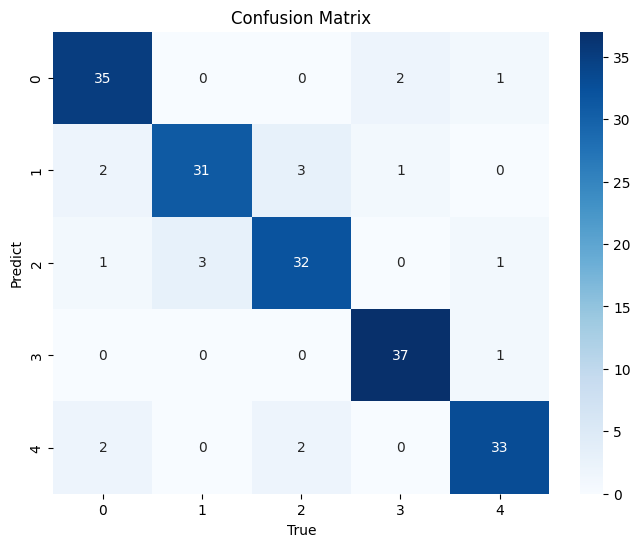

In [372]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict') 
plt.show()


## 8. Evaluations


Kode ini membuat DataFrame menggunakan Pandas yang berisi perbandingan akurasi dari tiga model berbeda: K-Nearest Neighbors (KNN), Random Forest, dan XGBoost. Selanjutnya, kode ini tampaknya ingin memvisualisasikan perbandingan akurasi ini. Berikut adalah penjelasan langkah-langkahnya:

Membuat DataFrame untuk Perbandingan Akurasi Model:

model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_smote*100, accuracy_rf_smote*100, accuracy_xgb_smote*100]}): Membuat DataFrame yang berisi nama model dan nilai akurasi masing-masing model, yang telah dihitung sebelumnya.
Menampilkan DataFrame:

model_comp1.head(): Menampilkan lima baris pertama dari DataFrame untuk memberikan gambaran awal.
Melakukan Visualisasi Perbandingan Akurasi:

Meskipun kode tidak menyertakan bagian ini, kemungkinan besar akan ada potongan kode tambahan untuk membuat visualisasi dari DataFrame ini, misalnya, menggunakan matplotlib atau seaborn.

In [373]:
import matplotlib.pyplot as plt

model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_smote*100,
accuracy_rf_smote*100,accuracy_xgb_smote*100]})
model_comp1.head()


,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,88.2



Kode ini membuat bar plot untuk memvisualisasikan perbandingan akurasi dari tiga model: K-Nearest Neighbors (KNN), Random Forest, dan XGBoost. Berikut adalah penjelasan langkah-langkahnya:

Membuat Bar Plot:

fig, ax = plt.subplots(): Membuat objek gambar dan sumbu menggunakan subplots().
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue']): Membuat bar plot dengan model sebagai sumbu x dan akurasi sebagai sumbu y. Warna bar plot ditentukan menggunakan parameter color.
Menambahkan Label dan Judul:

plt.xlabel('Model'): Menambahkan label sumbu x.
plt.ylabel('Accuracy (%)'): Menambahkan label sumbu y.
plt.title('Oversample'): Menambahkan judul plot.
Memutar Label Sumbu X:

plt.xticks(rotation=45, ha='right'): Memutar label sumbu x agar lebih mudah dibaca.
Menambahkan Keterangan Jumlah di Atas Setiap Bar:

for bar in bars: ...: Melakukan iterasi pada setiap bar dalam plot.
yval = bar.get_height(): Mendapatkan tinggi (nilai akurasi) dari setiap bar.
plt.text(...): Menambahkan teks di atas setiap bar, termasuk nilai akurasi yang dibulatkan.
Menampilkan Plot:

plt.show(): Menampilkan plot secara keseluruhan.

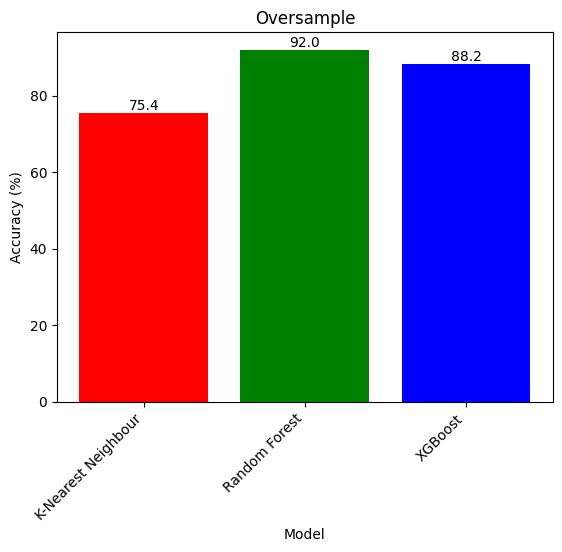

In [374]:
# Membuat bar plot dengan keterangan jumlah fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue']) 
plt.xlabel('Model')
plt.ylabel('Accuracy (%)') 
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar for bar in bars:
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom') 
plt.show()


Kode ini membuat DataFrame (model_comp2) yang berisi perbandingan akurasi dari tiga model berbeda (K-Nearest Neighbors, Random Forest, dan XGBoost) setelah normalisasi. DataFrame ini dapat digunakan untuk analisis atau visualisasi lebih lanjut.

In [375]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                    'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
                    accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})
model_comp2.head()


,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,88.2



Kode ini membuat bar plot untuk memvisualisasikan perbandingan akurasi dari tiga model: K-Nearest Neighbors (KNN), Random Forest, dan XGBoost setelah normalisasi. Berikut adalah penjelasan langkah-langkahnya:

Membuat Bar Plot:

fig, ax = plt.subplots(): Membuat objek gambar dan sumbu menggunakan subplots().
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue']): Membuat bar plot dengan model sebagai sumbu x dan akurasi sebagai sumbu y. Warna bar plot ditentukan menggunakan parameter color.
Menambahkan Label dan Judul:

plt.xlabel('Model'): Menambahkan label sumbu x.
plt.ylabel('Accuracy (%)'): Menambahkan label sumbu y.
plt.title('Normalization + Oversampling'): Menambahkan judul plot.
Memutar Label Sumbu X:

plt.xticks(rotation=45, ha='right'): Memutar label sumbu x agar lebih mudah dibaca.
Menambahkan Keterangan Jumlah di Atas Setiap Bar:

for bar in bars: ...: Melakukan iterasi pada setiap bar dalam plot.
yval = bar.get_height(): Mendapatkan tinggi (nilai akurasi) dari setiap bar.
plt.text(...): Menambahkan teks di atas setiap bar, termasuk nilai akurasi yang dibulatkan.
Menampilkan Plot:

plt.show(): Menampilkan plot secara keseluruhan.

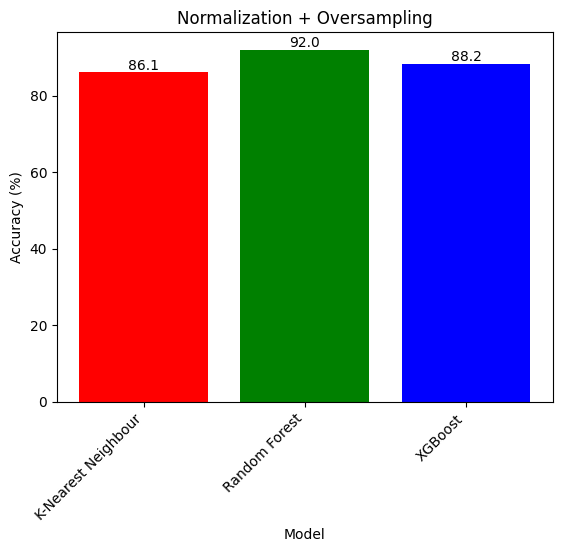

In [376]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue']) 
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom') 
plt.show()


Kode ini membuat DataFrame (model_comp3) yang berisi perbandingan akurasi dari tiga model berbeda (K-Nearest Neighbors, Random Forest, dan XGBoost) setelah normalisasi dan tuning hyperparameter. Nilai akurasi ini diperoleh dari model-model yang telah di-oversample, dinormalisasi, dan tuning hyperparameter.

In [377]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                    'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
                    accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})
model_comp3.head()


,Model,Accuracy
0,K-Nearest Neighbour,92.0
1,Random Forest,92.0
2,XGBoost,89.8



Kode ini membuat bar plot untuk memvisualisasikan perbandingan akurasi dari tiga model: K-Nearest Neighbors (KNN), Random Forest, dan XGBoost setelah normalisasi dan tuning hyperparameter. Berikut adalah penjelasan langkah-langkahnya:

Membuat Bar Plot:

fig, ax = plt.subplots(): Membuat objek gambar dan sumbu menggunakan subplots().
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue']): Membuat bar plot dengan model sebagai sumbu x dan akurasi sebagai sumbu y. Warna bar plot ditentukan menggunakan parameter color.
Menambahkan Label dan Judul:

plt.xlabel('Model'): Menambahkan label sumbu x.
plt.ylabel('Accuracy (%)'): Menambahkan label sumbu y.
plt.title('Normalization + Oversampling + Tuning'): Menambahkan judul plot.
Memutar Label Sumbu X:

plt.xticks(rotation=45, ha='right'): Memutar label sumbu x agar lebih mudah dibaca.
Menambahkan Keterangan Jumlah di Atas Setiap Bar:

for bar in bars: ...: Melakukan iterasi pada setiap bar dalam plot.
yval = bar.get_height(): Mendapatkan tinggi (nilai akurasi) dari setiap bar.
plt.text(...): Menambahkan teks di atas setiap bar, termasuk nilai akurasi yang dibulatkan.
Menampilkan Plot:

plt.show(): Menampilkan plot secara keseluruhan.

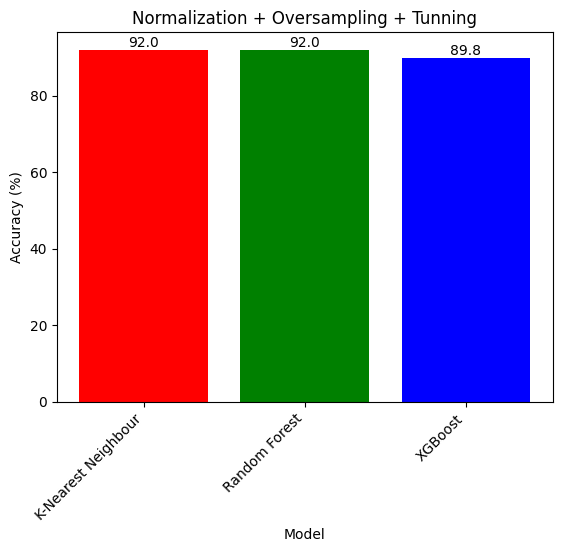

In [378]:
# Membuat bar plot dengan keterangan jumlah 
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue']) 
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom') 
plt.show()



DataFrame model_compBest dibuat untuk menyimpan perbandingan akurasi dari tiga model berbeda setelah menerapkan berbagai teknik seperti oversampling, normalisasi, dan tuning hyperparameter. Nilai akurasi ini mencakup model terbaik untuk setiap teknik yang digunakan.

In [379]:
# Data frame
model_compBest = pd.DataFrame({
    'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample', 'XGB OverSample Standarization Tunning'],
    'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100, accuracy_xgb_smote_normal_Tun*100]
})



Kode ini membuat bar plot untuk memvisualisasikan perbandingan akurasi dari tiga model berbeda setelah menerapkan berbagai teknik seperti oversampling, normalisasi, dan tuning hyperparameter. Berikut adalah penjelasan langkah-langkahnya:

Membuat Bar Plot:

fig, ax = plt.subplots(): Membuat objek gambar dan sumbu menggunakan subplots().
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue']): Membuat bar plot dengan model sebagai sumbu x dan akurasi sebagai sumbu y. Warna bar plot ditentukan menggunakan parameter color.
Menambahkan Label dan Judul:

plt.xlabel('Model'): Menambahkan label sumbu x.
plt.ylabel('Accuracy (%)'): Menambahkan label sumbu y.
plt.title('Best Model Comparison'): Menambahkan judul plot.
Memutar Label Sumbu X:

plt.xticks(rotation=45, ha='right'): Memutar label sumbu x agar lebih mudah dibaca.
Menambahkan Keterangan Jumlah di Atas Setiap Bar:

for bar in bars: ...: Melakukan iterasi pada setiap bar dalam plot.
yval = bar.get_height(): Mendapatkan tinggi (nilai akurasi) dari setiap bar.
plt.text(...): Menambahkan teks di atas setiap bar, termasuk nilai akurasi yang dibulatkan.
Menampilkan Plot:

plt.show(): Menampilkan plot secara keseluruhan.

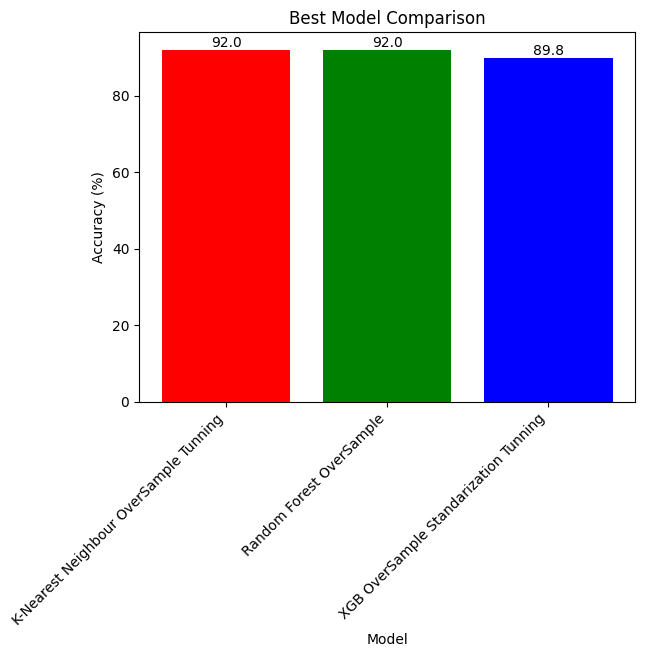

In [380]:
# Membuat bar plot dengan keterangan jumlah 
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue']) 
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom') 
plt.show()


## Conclusion

##### Dari penelitian diatas setelah melakukan pemodelan dengan algoritma KNN, Random Forest, dan XGBoost dengan berbagai penanganan data antara lain menggunakan random over sampling SMOTE untuk penanganan imbalance data, RandomSearchCV untuk tunning, dan Normalisasi data. Dapat disimpulkan bahwa klasifikasi menggunakan Random Over Sampling SMOTE pada model KNN menghasilkan akurasi 75.4 %, model Random Forest dengan akurasi yang dihasilkan yaitu 92%, dan model XGBoots menghasilkan akurasi 90.4%. Disamping itu bila klasifikasi menggunakan data yang sudah dilakukan normalisasi dan Random Over Sampling SMOTE pada model KNN menghasilkan akurasi 86.1%, model Random Forest menghasilkan akurasi 92%, dan model XGBoots menghasilkan akurasi 90.4%. Dan pada klasifikasi menggunakan data yang telah dilakukan tunning RandomSearchCV, normalisasi, dan Random Over Sampling SMOTE dalam model KNN menghasilkan akurasi 93%, pada model Random Forest menghasilkan akurasi 87.7%. dan model XGBoots menghasilkan akurasi 92%. Oleh karena itu, dalam penanganan data yang optimal untuk mengatasi ketidakseimbangan data adalah dengan menggunakan metode random Oversampling SMOTE sekaligus yang dilengkapi dengan tuning menggunakan RandomSearchCV dan normalisasi data, memberikan hasil yang signifikan dalam meningkatkan akurasi model klasifikasi khususnya pada model KNN dan XGBoots, namun hal itu tidak terjadi pada model Random Forest yang mengalami penurunan akurasi yang signifikan. Secara keseluruhan, penanganan dalam ketidakseimbangan data dengan menggunakan tunning parameter, normalisasi, dan oversampling dapat memberikan dampak signifikan terhadap performa model klasifikasi. Pemilihan model terbaik dan parameter optimal dapat meningkatkan akurasi dan kinerja model secara keseluruhan.
